In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

def cfun(x):
    if isinstance(x, str):        # isinstance(x, str) for python 3
        return x[1:].strip()
    else:
        return x

dKeys = ['Benzene','Lead','Manganese','MTBE Vol %','TAME Vol %','ETBE Vol %','DIPE Vol %','MTBE Wt %',
         'DIPE Wt %','ETBE Wt %','TAME Wt %','Methanol Vol %','Ethanol Vol %','T-Butanol Vol %',
         'Methanol Wt %','Ethanol Wt %','T-Butanol Wt %','Iso-propanol Wt %','n-Propanol Wt %',
         'sec-butanol Wt %','Iso-butanol Wt %','n-Butanol Wt %','tert-Pentanol Wt %','Aromatics',
         'Olefins','Saturates','Vapor Pressure']

con = dict.fromkeys(dKeys,cfun)

raw_data = pd.read_excel('NewYorkNJCT composition.xlsx', converters=con)

raw_data[dKeys]= raw_data[dKeys].apply(pd.to_numeric, errors = 'coerce', axis=0)

raw_data[dKeys] = raw_data[dKeys].replace({0:np.nan})

#raw_data.filter(items=['Results','Heading','Region','City','State'])
#for c in pd.unique(raw_data['State']):
    #print (c)


/Anaconda/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Anaconda/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


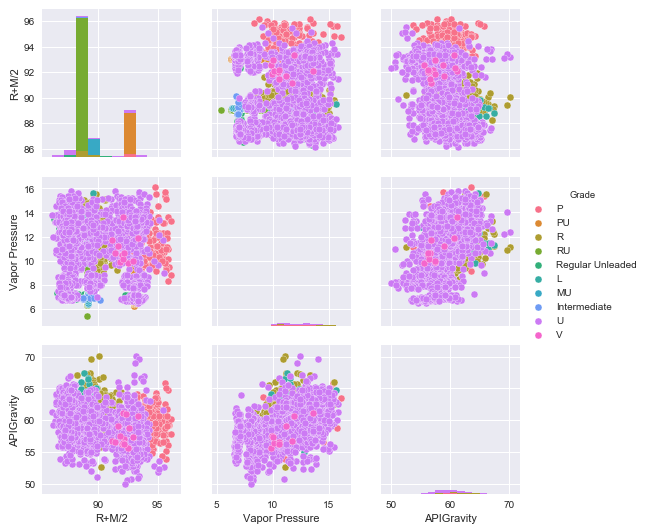

In [18]:
filData = raw_data.filter(items = ['SurveyName', 'Season', 'Date', 'Grade', 'Posted Octane', 'ResearchOctane',
                                   'MotorOctane', 'R+M/2', 'R+M/2.1','Vapor Pressure', 'APIGravity',
                                   'Specific Gravity'])
df1 = filData.filter(items = ['Grade','Posted Octane', 'ResearchOctane','MotorOctane',
                             'R+M/2', 'R+M/2.1','Vapor Pressure', 'APIGravity', 'Specific Gravity'])
df1 = df[df['APIGravity'] !=0]
plotData = df1.filter(items=['Grade','R+M/2','Vapor Pressure', 'APIGravity'])

#sns.lmplot('Vapor Pressure','R+M/2',df, hue ='Grade', fit_reg = False)
sns.pairplot(plotData, hue='Grade', size=2.5)
#sns.lmplot('Vapor Pressure','R+M/2',prData, hue ='Grade', fit_reg = False)
#sns.lmplot('Vapor Pressure','R+M/2',trData, hue ='Grade', fit_reg = False)


In [9]:
from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score

/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


1	69822.96987225644
2	3917.514135293622
3	1497.2053455725568
4	1018.3359570833234
5	600.9334750960996
6	429.26045070341695
7	326.00720510973906
8	266.50358087679155
9	215.76641023421456
10	175.29577783608477


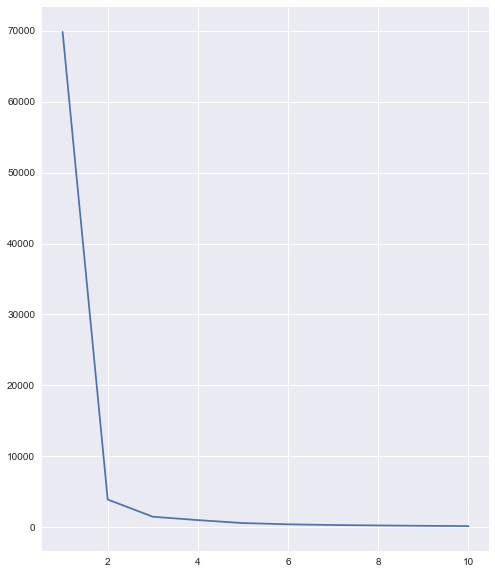

In [16]:
X = df1['R+M/2'].reshape(-1,1)
error_rate = []
cluster= []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, max_iter=1000).fit(X)
    label = kmeans.labels_
    #sil_coeff.append(silhouette_score(X, label, metric='euclidean'))
    cluster.append(i)
    error_rate.append(kmeans.inertia_) 

for i in range(len(cluster)):
    print ('{}\t{}'.format(cluster[i],error_rate[i]))


plt.figure(figsize=(8,10))
plt.plot(cluster,error_rate)



/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


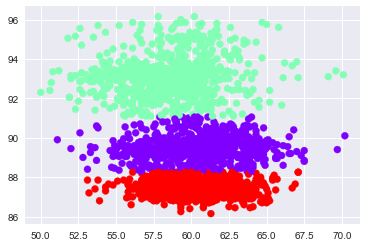

In [26]:
X = df1['R+M/2'].reshape(-1,1)
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(X)
df1['Kmeans_Labels']=kmeans.labels_
plt.scatter(df1['APIGravity'],df1['R+M/2'],c=df1['Kmeans_Labels'],cmap='rainbow')



In [158]:
trData = df[(df['Grade']=='P')|(df['Grade']=='PU')|(df['Grade']=='R')|(df['Grade']=='RU')|(df['Grade']=='Regular Unleaded')]
prData = df[(df['Grade']=='L')|(df['Grade']=='MU')|(df['Grade']=='Intermediate')|(df['Grade']=='U')|(df['Grade']=='V')]

#sns.lmplot('Vapor Pressure','R+M/2',prData, hue ='Grade', fit_reg = False)
#sns.lmplot('Vapor Pressure','R+M/2',trData, hue ='Grade', fit_reg = False)

trDf = trData.filter(items=['Vapor Pressure','R+M/2','Kmeans_Labels']).dropna()
prDf = prData.filter(items=['Vapor Pressure','R+M/2','Kmeans_Labels']).dropna()

print(trDf.shape)

(16420, 3)


In [141]:
from sklearn.preprocessing import StandardScaler
#scaler.fit(df.drop('TARGET CLASS',axis=1))

In [143]:
scaler = StandardScaler()

In [173]:
scaler.fit(trDf.drop('Kmeans_Labels', axis =1))
scaler.fit(prDf.drop('Kmeans_Labels', axis =1))
scaled_trDF = scaler.transform((trDf.drop('Kmeans_Labels', axis =1)))
sctrDf = pd.DataFrame(scaled_trDF, columns=trDf.columns[:-1])
scaled_prDf = scaler.transform((prDf.drop('Kmeans_Labels', axis =1)))
scprDf = pd.DataFrame(scaled_prDf, columns=prDf.columns[:-1])

#print(sctrDf.shape)
#print(scprDf.shape)

X_train = sctrDf
y_train = trDf.filter(items=['Kmeans_Labels'])
X_test = scprDf
y_test = prDf.filter(items=['Kmeans_Labels'])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)




(16420, 2)
(16420, 1)
(2961, 2)
(2961, 1)


In [174]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:


error_rate = []

# Will take some time
for i in range(100,500):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    #print(pred_i)
    error_rate.append(np.mean(pred_i != np.array(y_test)))
    


/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


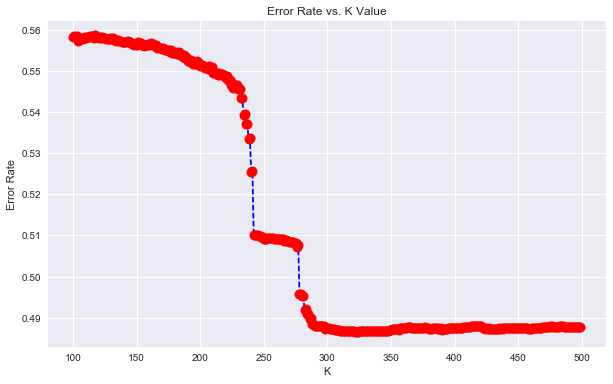

In [187]:
plt.figure(figsize=(10,6))
plt.plot(range(100,500),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
#plt.xlim(40,100)

In [193]:
knn = KNeighborsClassifier(n_neighbors=350)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)

X_test['KNN_Label']=pred_i

/Anaconda/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


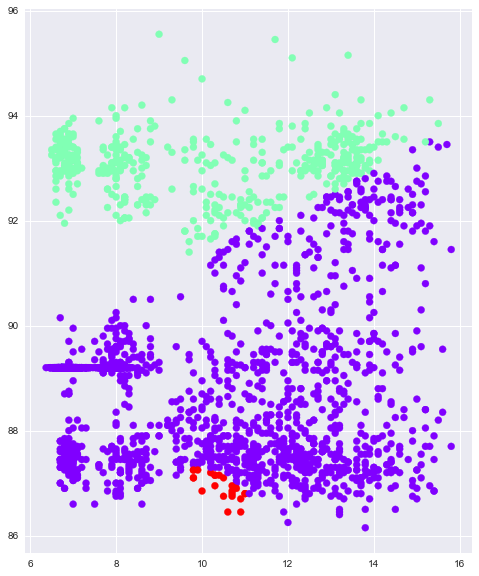

In [202]:
plt.figure(figsize=(8,10))
plt.scatter(prDf['Vapor Pressure'], prDf['R+M/2'],c=X_test['KNN_Label'],cmap='rainbow')